###  Regresión y regresión

# Plan
* Pasar y extensión py
* Abrir en spider
* Acumular resultados
* Cargar en power bi
* Dormir

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
conGraficos=True

# Funciones

In [4]:
def hm_corr_graf(corr_matrix_V2, cat):
    aux=pd.pivot_table(corr_matrix_V2,columns=['variable_2'],index=['variable_1'],values=['r'])
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    sns.heatmap(
        aux,
        annot     = True,
        cbar      = False,
        annot_kws = {"size": 10},
        vmin      = -0.5,
        vmax      = 0.5,
        center    = 0,
        cmap      = sns.diverging_palette(20, 220, n=200),
        square    = True,
        ax        = ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation = 45,
        horizontalalignment = 'right',
    )
    ax.tick_params(labelsize = 10)
    ax.set_title(cat)

In [5]:
# para ver el grado de correlación entre las variables disponibles.
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [6]:
def dic_corr_ind(data):
    corr_matrix = data.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    #res_corr_total_var_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_razones)]
    res_corr_total_raz_nacional=corr_tab_bajas[corr_tab_bajas['variable_1'].isin(sel_variables_causas2)]
    #res_corr_total_var_nacional.drop(columns=['abs_r'],inplace=True)
    res_corr_total_raz_nacional.drop(columns=['abs_r'],inplace=True)
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    
    res_corr_total_raz_nacional=res_corr_total_raz_nacional.sort_values('variable_1')
    
    #return res_corr_total_raz_nacional, res_corr_total_var_nacional, corr_tab_razones
    return res_corr_total_raz_nacional

In [7]:
def dic_corr_mes_ind(data):
    #res_corr_total_var=res_corr_total_var_nacional
    res_corr_total_raz=res_corr_total_raz_nacional
    dic_resultados={}
    
    for i in range(1,12):
        print(i)
        dic_aux={}
        data_aux=data[data['FECHA']==i]    
        corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
        corr_tab=tidy_corr_matrix(corr_matrix)
        corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
        #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]    
        dic_aux['total']=corr_tab_bajas    
        #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
        #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
        #dic_aux['razones']=corr_tab_razones
        dic_resultados[i]=dic_aux

    for i in range(1,12):
        print(i)
        #aux_tab_var=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_razones)]
        aux_tab_sel=dic_resultados[i]['total'][dic_resultados[i]['total']['variable_1'].isin(sel_variables_causas2)]
        #aux_tab_var.drop(columns=['abs_r'],inplace=True)
        aux_tab_sel.drop(columns=['abs_r'],inplace=True)
        #aux_tab_var.columns=['variable_1',str(i)+'_r']
        ###aux_tab_sel.columns=['variable_1',str(i)+'_r']    
        aux_tab_sel.columns=['variable_1',i]
        #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
        res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')
    
    res_corr_total_raz_T=res_corr_total_raz.T
    res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
    res_corr_total_raz_T = res_corr_total_raz_T.iloc[2:]   
    
    #res_corr_total_var_T=res_corr_total_var.T
    #res_corr_total_var_T.columns = res_corr_total_var_T.iloc[0]
    #res_corr_total_var_T = res_corr_total_var_T.iloc[1:]
    
    #return res_corr_total_raz_T, res_corr_total_var_T
    return res_corr_total_raz_T

In [8]:
def iter_regresion_VIF(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            if fila_problema['VIF'].values[0]>20 :
                variables_eliminar=fila_problema['Features']
            else:
                flag=0 
                
    return df_revision

In [9]:
def iter_regresion(data_reg):    
    i=0
    flag=1
    variables_eliminar=['ind_churn','FECHA']
    y_train = data_reg['ind_churn']    
   
    while flag>0:
        i=i+1
        print(i)
        data_reg=data_reg.drop(columns=variables_eliminar)
        # Dividir en X y X       
        X_train =  data_reg
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()
        #lr_1.summary()
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        #vif
        df_coef=lr_1.params.to_frame()
        df_coef.columns=['coefs']
        df_p_values=lr_1.pvalues.to_frame()
        df_p_values.columns=['pvalues'] 
        
        df_revision=df_coef.merge(df_p_values, left_index=True, right_index=True)
        df_revision=df_revision.merge(vif, left_index=True, right_on=['Features'])
        print(df_revision)
        fila_problema=df_revision.sort_values(['pvalues'],ascending=False).head(1)
        print(fila_problema)
        if fila_problema['pvalues'].values[0]>0.05 :
            variables_eliminar=fila_problema['Features']
        else:
            flag=0
            #fila_problema=df_revision.sort_values(['VIF'],ascending=False).head(1)
            #if fila_problema['VIF'].values[0]>20 :
            #    variables_eliminar=fila_problema['Features']
            #else:                 
                
    return df_revision

In [10]:
def dic_reg_mes_ind(data_reg):
    df_coef=df_coef_nal
    df_vif=df_vif_nal
    dic_resultados={}
    
    for i in range(1,12):
        dic_aux={}
        data_aux=data_reg[data_reg['FECHA']==i] 
        data_aux.drop(columns=['FECHA'],inplace=True)
        #data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
        
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]    
        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados[i]=dic_aux
    
    for i in range(1,12):
        print(i)

        aux_tab_coef=dic_resultados[i]['coef']
        aux_tab_vif=dic_resultados[i]['vif']

        #aux_tab_coef.columns=[str(i)+'_coef']
        aux_tab_coef.columns=[i]
        #aux_tab_vif.columns=['Features',str(i)+'_vif']
        aux_tab_vif.columns=['Features',i]

        df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
        df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

    return df_coef, df_vif

# Carga Preprocesamiento

In [11]:
data_c0= pd.read_csv('../NODOS_FILTRADOS_baseTodo.csv',sep=';', header = 0)

In [12]:
data_c0.describe()

,MES,CANT_USER,BAJAS_1.TOTAL,BAJAS_2.CHURN_TEMPRANO,BAJAS_3.CHURN_7_24,BAJAS_4.VOL,BAJAS_5.INVOL,BAJAS_6.VOL_CHURN_TEMPRANO,BAJAS_7.INVOL_CHURN_TEMPRANO,BAJAS_8.VOL_CHURN_7_24,...,BAJAS_36.@_INVOL_CHURN_7_24,ALFA,ALFA_tarifa,BETA,Llamadas_3M,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
count,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,38225.000000,...,38225.000000,38161.000000,37804.000000,38206.000000,38225.000000,38225.000000,38225.000000,38179.000000,38212.000000,38225.000000
mean,6.000000,288.078901,0.080229,0.014750,0.026101,0.040596,0.039633,0.002432,0.012318,0.010535,...,0.005926,1.289963,0.963787,1.289975,0.253055,0.221078,0.027602,1.006921,0.499631,0.365970
std,3.162319,132.518093,0.044296,0.019149,0.024676,0.025301,0.037808,0.005505,0.017614,0.013080,...,0.007177,0.933955,0.189861,0.569264,0.163750,0.142463,0.033747,0.587491,0.145628,0.096088
min,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.415299,0.139640,0.000000,0.000000,0.000000,0.000000,0.000000,0.133588
25%,3.000000,193.000000,0.049180,0.000000,0.008287,0.023392,0.011905,0.000000,0.000000,0.000000,...,0.000000,0.598521,0.824831,0.911394,0.133065,0.116541,0.000000,0.559483,0.392541,0.296190
50%,6.000000,270.000000,0.072954,0.009063,0.020645,0.036923,0.030100,0.000000,0.005988,0.006961,...,0.003953,1.090514,0.948466,1.177389,0.224199,0.196517,0.017045,0.925755,0.497879,0.350120
75%,9.000000,361.000000,0.103704,0.022059,0.037671,0.053299,0.057252,0.000000,0.018657,0.016949,...,0.008929,1.759093,1.086801,1.526151,0.342697,0.299191,0.039735,1.375995,0.604935,0.418627
max,11.000000,1366.000000,0.431034,0.238095,0.270588,0.375940,0.413793,0.070588,0.238095,0.154472,...,0.082873,6.351504,1.511379,4.666667,0.976077,0.824903,0.216590,3.175737,0.879946,0.688474


In [13]:
data_c0.columns

Index(['MES', 'NODO', 'DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO',
       'CANT_USER', 'BAJAS_1.TOTAL', 'BAJAS_2.CHURN_TEMPRANO',
       'BAJAS_3.CHURN_7_24', 'BAJAS_4.VOL', 'BAJAS_5.INVOL',
       'BAJAS_6.VOL_CHURN_TEMPRANO', 'BAJAS_7.INVOL_CHURN_TEMPRANO',
       'BAJAS_8.VOL_CHURN_7_24', 'BAJAS_9.INVOL_CHURN_7_24', 'BAJAS_10.V',
       'BAJAS_11.V_CHURN_TEMPRANO', 'BAJAS_12.V_CHURN_7_24', 'BAJAS_13.V_VOL',
       'BAJAS_14.V_INVOL', 'BAJAS_15.V_VOL_CHURN_TEMPRANO',
       'BAJAS_16.V_INVOL_CHURN_TEMPRANO', 'BAJAS_17.V_VOL_CHURN_7_24',
       'BAJAS_18.V_INVOL_CHURN_7_24', 'BAJAS_19.T',
       'BAJAS_20.T_CHURN_TEMPRANO', 'BAJAS_21.T_CHURN_7_24', 'BAJAS_22.T_VOL',
       'BAJAS_23.T_INVOL', 'BAJAS_24.T_VOL_CHURN_TEMPRANO',
       'BAJAS_25.T_INVOL_CHURN_TEMPRANO', 'BAJAS_26.T_VOL_CHURN_7_24',
       'BAJAS_27.T_INVOL_CHURN_7_24', 'BAJAS_28.@',
       'BAJAS_29.@_CHURN_TEMPRANO', 'BAJAS_30.@_CHURN_7_24', 'BAJAS_31.@_VOL',
       'BAJAS_32.@_INVOL', 'BAJAS_33.@_VOL_CHURN_TEMPRANO

In [14]:
sel_variables_descrip=['MES','NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO','CANT_USER']
sel_variables_causas2=['ALFA_tarifa','ALFA', 'BETA', 'MEGA', 'Llamadas_Admin_3M', 'Llamadas_Tecn_3M','PENETRACION','OCUPACION_DW']
columns_bajas=list(data_c0.filter(regex=("BAJAS.*")).columns)

### Reemplazar nombre de columnas por compatibilidad

In [15]:
data_c0.rename(columns={'MES':'FECHA','NODO':'COD_NODO'}, inplace=True)

In [16]:
maestro_data=data_c0[['COD_NODO','DIVISION', 'AREA', 'ZONA', 'CIUDAD', 'DISTRITO']].drop_duplicates()

## CORRELACIONES

###  Correlacion Bajas Totales

##  Funcion validar configuraciones Nacional

In [17]:
#data_c0['BAJAS_1.TOTAL'].sum()
data_c0['BAJAS_31.@_VOL'].sum()


587.5311197723252

In [18]:
data_c0['ind_churn']=data_c0['BAJAS_31.@_VOL']

In [19]:
data_c0['COD_NODO'].value_counts().min()

11

In [20]:
#Eliminar validación ==1
data_c0['val_ind']=np.where(data_c0['ind_churn']==0,1,0)

In [21]:
data_c0.groupby('COD_NODO')[['val_ind']].max().describe()

,val_ind
count,3475.000000
mean,0.315396
std,0.464740
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data_c0['COD_NODO'].nunique()

3475

In [23]:
res_nodo=data_c0.groupby('COD_NODO')[['val_ind']].max()

In [24]:
res_nodo['val_ind'].value_counts()

0    2379
1    1096
Name: val_ind, dtype: int64

In [25]:
# TODA LA DATA
#data_c0=data_c0[data_c0['COD_NODO'].isin(res_nodo[res_nodo['val_ind']==0].index)]

In [26]:
data_c0['COD_NODO'].nunique()

3475

# Val Configuraciones

In [27]:
DataSetEntregable_totales=pd.DataFrame()

In [28]:
DataSetEntregable_totales_temp=pd.DataFrame()

In [29]:
res_corr_total_raz_nacional=dic_corr_ind(data_c0)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [30]:
res_corr_total_raz_nacional.rename(columns={'r':'NACIONAL'},inplace=True)

In [31]:
RV_nal_c0=dic_corr_ind(data_c0)

In [32]:
RV_nal_c0.rename(columns={'r':'NACIONAL'},inplace=True)

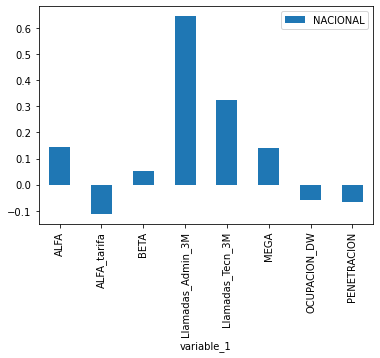

In [33]:
if conGraficos:
    RV_nal_c0.set_index('variable_1').plot.bar()

In [34]:
DataSetEntregable_totales=RV_nal_c0.copy()

In [35]:
DataSetEntregable_totales=DataSetEntregable_totales.set_index('variable_1').T

### Correlaciones x Periodo

### Funcion correlaciones por periodo
* Recibe los datos y retorna data framames para graficar

In [36]:
#(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_c0)
res_corr_total_raz_T=dic_corr_mes_ind(data_c0)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
1,0.157858,-0.12423,0.035122,0.653403,0.319204,0.160909,-0.072048,-0.004534
2,0.172061,-0.166266,0.042222,0.684037,0.293776,0.176542,-0.070717,-0.009069
3,0.173542,-0.165653,0.079343,0.66367,0.289797,0.15734,-0.071915,-0.053301
4,0.131797,-0.107277,0.044639,0.702138,0.357067,0.12386,-0.068474,-0.081598
5,0.145553,-0.089342,0.030966,0.641123,0.359831,0.155311,-0.056426,-0.088985
6,0.164322,-0.12803,0.048778,0.667158,0.365885,0.16563,-0.066439,-0.090613
7,0.135608,-0.119343,0.012295,0.650164,0.321422,0.152832,-0.068461,-0.073447
8,0.141057,-0.083882,0.022713,0.697105,0.330611,0.152854,-0.033237,-0.049723
9,0.154613,-0.074259,0.023892,0.645118,0.287026,0.162849,-0.08118,-0.071879
10,0.114895,-0.025946,-0.016731,0.6907,0.346837,0.145758,-0.035803,-0.067136


In [38]:
DataSetEntregable_totales_temp=res_corr_total_raz_T.copy()

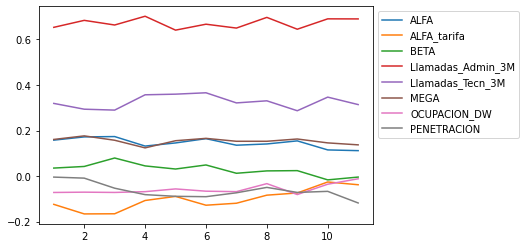

In [39]:
if conGraficos:
    ax = res_corr_total_raz_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

### Analisis Específicos

In [40]:
#data=data_c0.merge(maestro_data, left_on=['COD_NODO'], right_on=['COD_NODO'], how='left')
data=data_c0.copy()

In [41]:
data.groupby('DIVISION')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False)

,CANT_USER
DIVISION,
REGION CENTRO,5545321
REGION OCCIDENTE,2246266
REGION NOROCCIDENTE,1913471
REGION ORIENTE,896574
REGION COSTA,410184


In [42]:
data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6)

,CANT_USER
CIUDAD,
BOGOTA,5408878
CALI,1332658
MEDELLIN,1057335
PEREIRA,374828
BUCARAMANGA,300867
IBAGUE,296704


In [43]:
data[data['CIUDAD']=='BOGOTA'].groupby('AREA')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(10)

,CANT_USER
AREA,
BOGOTA ORIENTE,1445416
BOGOTA NORTE,1361183
BOGOTA OCCIDENTE,1345893
BOGOTA SUR,1256386


### Analisis regionales

In [44]:
regionales=data['DIVISION'].unique()
regionales = [x for x in regionales if pd.notnull(x)]
regionales

['REGION COSTA',
 'REGION ORIENTE',
 'REGION CENTRO',
 'REGION NOROCCIDENTE',
 'REGION OCCIDENTE']

In [45]:
dic_resultados={}

In [46]:
for reg in regionales:
    print(reg)
    dic_aux={}
    data_aux=data[data['DIVISION']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [47]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in regionales:
    print(reg)
    #aux_tab_var=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados[reg]['total'][dic_resultados[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg]
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [48]:
res_corr_total_raz_nacional

,variable_1,NACIONAL
1909,ALFA,0.145561
1958,ALFA_tarifa,-0.112091
2007,BETA,0.051958
2105,Llamadas_Admin_3M,0.643728
2154,Llamadas_Tecn_3M,0.323773
2203,MEGA,0.139595
2252,OCUPACION_DW,-0.058552
2301,PENETRACION,-0.065108


In [49]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [50]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.145561,-0.112091,0.051958,0.643728,0.323773,0.139595,-0.058552,-0.065108
REGION COSTA,0.131262,-0.146114,0.049475,0.567002,0.260599,0.114644,-0.090451,-0.023604
REGION ORIENTE,0.144455,-0.066338,0.046054,0.662739,0.318368,0.140433,-0.025425,-0.11561
REGION CENTRO,0.137806,-0.170338,0.060393,0.641657,0.34234,0.122197,-0.06585,-0.077001
REGION NOROCCIDENTE,0.066707,-0.069248,0.019257,0.646863,0.308868,0.06948,-0.027711,-0.012847
REGION OCCIDENTE,0.186243,-0.029953,0.063906,0.655419,0.31459,0.181872,-0.062303,-0.109598


In [51]:
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.145561,-0.112091,0.051958,0.643728,0.323773,0.139595,-0.058552,-0.065108
REGION COSTA,0.131262,-0.146114,0.049475,0.567002,0.260599,0.114644,-0.090451,-0.023604
REGION ORIENTE,0.144455,-0.066338,0.046054,0.662739,0.318368,0.140433,-0.025425,-0.11561
REGION CENTRO,0.137806,-0.170338,0.060393,0.641657,0.34234,0.122197,-0.06585,-0.077001
REGION NOROCCIDENTE,0.066707,-0.069248,0.019257,0.646863,0.308868,0.06948,-0.027711,-0.012847
REGION OCCIDENTE,0.186243,-0.029953,0.063906,0.655419,0.31459,0.181872,-0.062303,-0.109598


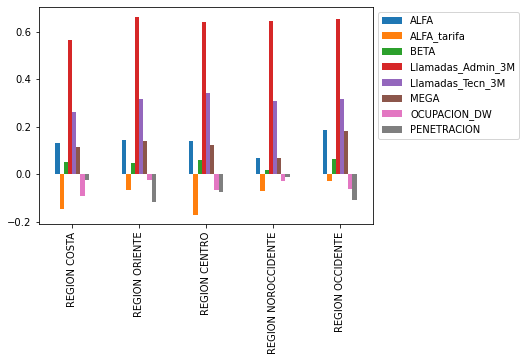

In [52]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(30,20));

### Analisis Temporal_ ESPECIFICO

In [53]:
## guardar en tabla
for reg in regionales:
    data_aux=data[data['DIVISION']==reg]    
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
DataSetEntregable_totales_temp['CATEGORIA']=DataSetEntregable_totales_temp['CATEGORIA'].fillna('NACIONAL')

In [55]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.157858,-0.12423,0.035122,0.653403,0.319204,0.160909,-0.072048,-0.004534,NACIONAL
2,0.172061,-0.166266,0.042222,0.684037,0.293776,0.176542,-0.070717,-0.009069,NACIONAL
3,0.173542,-0.165653,0.079343,0.66367,0.289797,0.15734,-0.071915,-0.053301,NACIONAL
4,0.131797,-0.107277,0.044639,0.702138,0.357067,0.12386,-0.068474,-0.081598,NACIONAL
5,0.145553,-0.089342,0.030966,0.641123,0.359831,0.155311,-0.056426,-0.088985,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,0.123994,0.061494,0.0058,0.647142,0.303676,0.1309,-0.075281,-0.158759,REGION OCCIDENTE
8,0.257812,-0.048185,0.067583,0.683737,0.269266,0.281405,-0.066693,-0.099247,REGION OCCIDENTE
9,0.126133,-0.040185,0.017624,0.659609,0.315721,0.14544,-0.054381,-0.091492,REGION OCCIDENTE
10,0.145941,-0.01047,-0.009835,0.690582,0.341631,0.160842,-0.058937,-0.172902,REGION OCCIDENTE


## Ciudades

In [56]:
ciudades=data.groupby('CIUDAD')['CANT_USER'].sum().to_frame().sort_values('CANT_USER',ascending=False).head(6).index
ciudades

Index(['BOGOTA', 'CALI', 'MEDELLIN', 'PEREIRA', 'BUCARAMANGA', 'IBAGUE'], dtype='object', name='CIUDAD')

In [57]:
dic_resultados_ciudad={}

In [58]:
for reg in ciudades:
    print(reg)
    dic_aux={}
    data_aux=data[data['CIUDAD']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_ciudad[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [59]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in ciudades:
    print(reg)
    #aux_tab_var=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_ciudad[reg]['total'][dic_resultados_ciudad[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [60]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]

In [61]:
res_corr_total_raz_T

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.145561,-0.112091,0.051958,0.643728,0.323773,0.139595,-0.058552,-0.065108
BOGOTA,0.136068,-0.170399,0.059267,0.640093,0.341972,0.121038,-0.064459,-0.073186
CALI,0.21059,-0.090397,0.045295,0.652306,0.305129,0.218474,-0.081754,-0.068565
MEDELLIN,0.090758,-0.078467,0.0506,0.661165,0.308644,0.073775,-0.070196,-0.091956
PEREIRA,0.006782,0.119302,-0.054985,0.646703,0.345063,0.052993,0.099701,0.08827
BUCARAMANGA,0.056133,0.045293,0.041306,0.66132,0.317056,0.042966,0.046744,-0.015551
IBAGUE,0.091907,0.102064,0.025811,0.633077,0.303544,0.094198,0.078565,-0.043313


In [62]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.145561,-0.112091,0.051958,0.643728,0.323773,0.139595,-0.058552,-0.065108
REGION COSTA,0.131262,-0.146114,0.049475,0.567002,0.260599,0.114644,-0.090451,-0.023604
REGION ORIENTE,0.144455,-0.066338,0.046054,0.662739,0.318368,0.140433,-0.025425,-0.11561
REGION CENTRO,0.137806,-0.170338,0.060393,0.641657,0.34234,0.122197,-0.06585,-0.077001
REGION NOROCCIDENTE,0.066707,-0.069248,0.019257,0.646863,0.308868,0.06948,-0.027711,-0.012847
REGION OCCIDENTE,0.186243,-0.029953,0.063906,0.655419,0.31459,0.181872,-0.062303,-0.109598
BOGOTA,0.136068,-0.170399,0.059267,0.640093,0.341972,0.121038,-0.064459,-0.073186
CALI,0.21059,-0.090397,0.045295,0.652306,0.305129,0.218474,-0.081754,-0.068565
MEDELLIN,0.090758,-0.078467,0.0506,0.661165,0.308644,0.073775,-0.070196,-0.091956
PEREIRA,0.006782,0.119302,-0.054985,0.646703,0.345063,0.052993,0.099701,0.08827


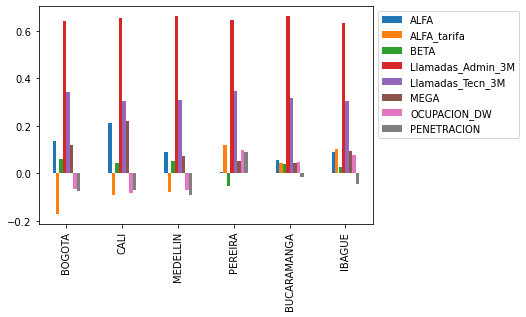

In [63]:
if conGraficos:
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

### Analisis temporal

In [64]:
## guardar en tabla
for reg in ciudades:
    data_aux=data[data['CIUDAD']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


9
10
11
1
2
3
4
5
6
7
8
9
10
11


In [65]:
DataSetEntregable_totales_temp

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION,CATEGORIA
1,0.157858,-0.12423,0.035122,0.653403,0.319204,0.160909,-0.072048,-0.004534,NACIONAL
2,0.172061,-0.166266,0.042222,0.684037,0.293776,0.176542,-0.070717,-0.009069,NACIONAL
3,0.173542,-0.165653,0.079343,0.66367,0.289797,0.15734,-0.071915,-0.053301,NACIONAL
4,0.131797,-0.107277,0.044639,0.702138,0.357067,0.12386,-0.068474,-0.081598,NACIONAL
5,0.145553,-0.089342,0.030966,0.641123,0.359831,0.155311,-0.056426,-0.088985,NACIONAL
...,...,...,...,...,...,...,...,...,...
7,-0.067966,0.188488,-0.197739,0.692048,0.306801,0.034088,0.026937,-0.075764,IBAGUE
8,0.180084,0.258098,0.080129,0.696503,0.172559,0.164226,0.042384,0.010666,IBAGUE
9,0.068385,0.079985,-0.081585,0.69737,0.564775,0.10983,0.224451,0.035081,IBAGUE
10,-0.059248,0.140766,-0.043453,0.725401,0.369546,-0.037846,-0.023335,-0.26909,IBAGUE


### Bogotá

In [66]:
sectoresBog=data[data['CIUDAD']=='BOGOTA']['AREA'].unique()

In [67]:
dic_resultados_Bogota={}

In [68]:
for reg in sectoresBog:
    print(reg)
    dic_aux={}
    data_aux=data[data['AREA']==reg]    
    corr_matrix = data_aux.select_dtypes(include=['float64', 'int','int64']).corr(method='spearman')
    corr_tab=tidy_corr_matrix(corr_matrix)
    corr_tab_bajas=corr_tab[corr_tab['variable_2']=='ind_churn'].drop(columns=['variable_2'])
    #corr_tab_bajas=corr_tab_bajas[~corr_tab_bajas['variable_1'].isin(['val_muestras_ok'])]
    
    dic_aux['total']=corr_tab_bajas
    
    #corr_tab_razones=corr_tab[corr_tab['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_1'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[~corr_tab_razones['variable_2'].isin(['BAJAS_TOTAL'])]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_2'].isin(sel_variables_razones)]
    #corr_tab_razones=corr_tab_razones[corr_tab_razones['variable_1'].isin(sel_variables_causas2)]
    
    #dic_aux['razones']=corr_tab_razones
    dic_resultados_Bogota[reg]=dic_aux

BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE


In [69]:
#res_corr_total_var=res_corr_total_var_nacional
res_corr_total_raz=res_corr_total_raz_nacional
for reg in sectoresBog:
    print(reg)
    #aux_tab_var=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_razones)]
    aux_tab_sel=dic_resultados_Bogota[reg]['total'][dic_resultados_Bogota[reg]['total']['variable_1'].isin(sel_variables_causas2)]
    #aux_tab_var.drop(columns=['abs_r'],inplace=True)
    aux_tab_sel.drop(columns=['abs_r'],inplace=True)
    #aux_tab_var.columns=['variable_1',reg+'_r']
    aux_tab_sel.columns=['variable_1',reg]
    
    #res_corr_total_var=res_corr_total_var.merge(aux_tab_var,left_on='variable_1',right_on='variable_1', how='left')
    res_corr_total_raz=res_corr_total_raz.merge(aux_tab_sel,left_on='variable_1',right_on='variable_1', how='left')

BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


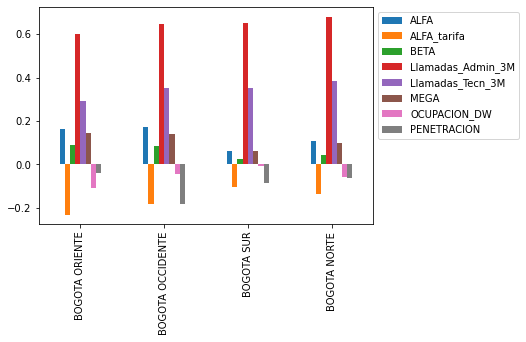

In [70]:
res_corr_total_raz_T=res_corr_total_raz.T
res_corr_total_raz_T.columns = res_corr_total_raz_T.iloc[0]
res_corr_total_raz_T = res_corr_total_raz_T.iloc[1:]
if conGraficos:    
    ax = res_corr_total_raz_T[1:].plot.bar()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot()

In [71]:
res_corr_total_raz_T[1:]

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
BOGOTA ORIENTE,0.163808,-0.230744,0.088288,0.598391,0.291046,0.142524,-0.108737,-0.040684
BOGOTA OCCIDENTE,0.173717,-0.180112,0.086597,0.647845,0.35082,0.138976,-0.045519,-0.182069
BOGOTA SUR,0.061046,-0.10445,0.02412,0.651838,0.352223,0.063798,-0.008098,-0.083904
BOGOTA NORTE,0.107981,-0.134586,0.043135,0.67925,0.383408,0.096454,-0.055909,-0.063528


In [72]:
DataSetEntregable_totales=DataSetEntregable_totales.append(res_corr_total_raz_T[1:])
DataSetEntregable_totales

variable_1,ALFA,ALFA_tarifa,BETA,Llamadas_Admin_3M,Llamadas_Tecn_3M,MEGA,OCUPACION_DW,PENETRACION
NACIONAL,0.145561,-0.112091,0.051958,0.643728,0.323773,0.139595,-0.058552,-0.065108
REGION COSTA,0.131262,-0.146114,0.049475,0.567002,0.260599,0.114644,-0.090451,-0.023604
REGION ORIENTE,0.144455,-0.066338,0.046054,0.662739,0.318368,0.140433,-0.025425,-0.11561
REGION CENTRO,0.137806,-0.170338,0.060393,0.641657,0.34234,0.122197,-0.06585,-0.077001
REGION NOROCCIDENTE,0.066707,-0.069248,0.019257,0.646863,0.308868,0.06948,-0.027711,-0.012847
REGION OCCIDENTE,0.186243,-0.029953,0.063906,0.655419,0.31459,0.181872,-0.062303,-0.109598
BOGOTA,0.136068,-0.170399,0.059267,0.640093,0.341972,0.121038,-0.064459,-0.073186
CALI,0.21059,-0.090397,0.045295,0.652306,0.305129,0.218474,-0.081754,-0.068565
MEDELLIN,0.090758,-0.078467,0.0506,0.661165,0.308644,0.073775,-0.070196,-0.091956
PEREIRA,0.006782,0.119302,-0.054985,0.646703,0.345063,0.052993,0.099701,0.08827


### Resultado Atemporal

In [73]:
### Guardar Archivo
##DataSetEntregable_totales.to_csv('CorrelacionesAgrupadas_14Dic.csv',sep=';')

### Temporales

In [74]:
## guardar en tabla
for reg in sectoresBog:
    data_aux=data[data['AREA']==reg]      
    #(res_corr_total_raz_T, res_corr_total_var_T)=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T=dic_corr_mes_ind(data_aux)
    res_corr_total_raz_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp=DataSetEntregable_totales_temp.append(res_corr_total_raz_T)

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Resulado Temporal

In [75]:
#DataSetEntregable_totales_temp.to_csv('CorrelacionesTemporales_14Dic.csv',sep=';')

# Regresión multilineal

* Reescalado
* Modelos

In [76]:
DataSetEntregable_totales_reg=pd.DataFrame()
DataSetEntregable_totales_temp_reg=pd.DataFrame()

In [77]:
data_reg=data_c0.copy()

In [78]:
sel_variables_causas2

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

In [79]:
data_reg.set_index('COD_NODO',inplace=True)

In [80]:
data_reg=data_reg[sel_variables_causas2+['ind_churn','FECHA']]

In [81]:
data_reg.isnull().sum()/len(data_reg)

ALFA_tarifa          0.011014
ALFA                 0.001674
BETA                 0.000497
MEGA                 0.001203
Llamadas_Admin_3M    0.000000
Llamadas_Tecn_3M     0.000000
PENETRACION          0.000000
OCUPACION_DW         0.000340
ind_churn            0.000000
FECHA                0.000000
dtype: float64

In [82]:
data_reg=data_reg.dropna()

In [83]:
colums_reg=list(data_reg.columns)

In [84]:
colums_reg.remove('FECHA')

In [85]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW',
 'ind_churn']

In [86]:
#for col in colums_reg:
#    data_reg[col]=np.log1p(data_reg[col])

In [87]:
## Escalar
#cols=data_reg.columns
scaler = MinMaxScaler()
data_reg[colums_reg]= scaler.fit_transform(data_reg[colums_reg])

In [88]:
colums_reg.remove('ind_churn')

In [89]:
colums_reg

['ALFA_tarifa',
 'ALFA',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Seleccion Variables Significativas

In [90]:
reg_nal=iter_regresion(data_reg)
reg_nal

1
      coefs        pvalues           Features    VIF
0 -0.052688  9.157179e-195        ALFA_tarifa   8.29
1  0.003392   5.553871e-01               ALFA  21.50
2  0.026355   2.811054e-09               BETA  13.04
3  0.023868   5.548214e-10               MEGA  17.61
4  0.263765   0.000000e+00  Llamadas_Admin_3M   4.33
5  0.011727   1.060811e-08   Llamadas_Tecn_3M   2.15
6 -0.019248   4.234668e-31        PENETRACION   5.99
7 -0.026448   3.178855e-51       OCUPACION_DW  10.94
      coefs   pvalues Features   VIF
1  0.003392  0.555387     ALFA  21.5
2
      coefs        pvalues           Features    VIF
0 -0.052728  2.433680e-195        ALFA_tarifa   7.52
1  0.028592   1.566858e-35               BETA   4.08
2  0.025930   1.108330e-58               MEGA   3.54
3  0.263782   0.000000e+00  Llamadas_Admin_3M   4.31
4  0.011719   1.085608e-08   Llamadas_Tecn_3M   2.15
5 -0.019240   4.465014e-31        PENETRACION   5.79
6 -0.026456   2.949485e-51       OCUPACION_DW  10.36
      coefs       pva

,coefs,pvalues,Features,VIF
0,-0.052728,2.433680e-195,ALFA_tarifa,7.52
1,0.028592,1.566858e-35,BETA,4.08
2,0.025930,1.108330e-58,MEGA,3.54
3,0.263782,0.000000e+00,Llamadas_Admin_3M,4.31
4,0.011719,1.085608e-08,Llamadas_Tecn_3M,2.15
5,-0.019240,4.465014e-31,PENETRACION,5.79
6,-0.026456,2.949485e-51,OCUPACION_DW,10.36


In [91]:
colums_reg=list(reg_nal['Features'])
colums_reg

['ALFA_tarifa',
 'BETA',
 'MEGA',
 'Llamadas_Admin_3M',
 'Llamadas_Tecn_3M',
 'PENETRACION',
 'OCUPACION_DW']

### Nacional

In [92]:
# Dividir en X y X
y_train = data_reg['ind_churn']
X_train =  data_reg[colums_reg]

In [93]:
#Modelos
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ind_churn   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     4139.
Date:                Fri, 24 Dec 2021   Prob (F-statistic):               0.00
Time:                        08:48:14   Log-Likelihood:                 55977.
No. Observations:               37732   AIC:                        -1.119e+05
Df Residuals:                   37724   BIC:                        -1.119e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0826      0.002     43.557      0.000       0.079       0.086
ALFA_tarifa          -0.0527      0.002    -29.993      0.000      -0.056      -0.049
BETA                  0.0286      0.002     12.454      0.000       0.024       0.033
MEGA                  0.0259      0.002     16.180      0.000       0.023       0.029
Llamadas_Admin_3M     0.2638      0.002    141.296      0.000       0.260       0.267
Llamadas_Tecn_3M      0.0117      0.002      5.718      0.000       0.008       0.016
PENETRACION          -0.0192      0.002    -11.604      0.000      -0.022      -0.016
OCUPACION_DW         -0.0265      0.002    -15.083      0.000      -0.030      -0.023
==============================================================================
Omnibus:                     7415.453   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33093.744
Skew:                           0.901   Prob(JB):                         0.00
Kurtosis:                       7.220   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
# Cálculo VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,OCUPACION_DW,10.36
0,ALFA_tarifa,7.52
5,PENETRACION,5.79
3,Llamadas_Admin_3M,4.31
1,BETA,4.08
2,MEGA,3.54
4,Llamadas_Tecn_3M,2.15


In [95]:
df_coef_nal=lr_1.params.to_frame()
df_coef_nal.columns=['coefs']

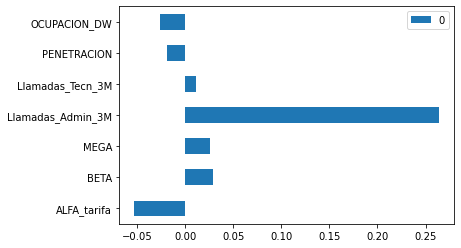

In [96]:
if conGraficos:
    lr_1.params.to_frame()[1:].plot.barh()

In [97]:
df_coef_nal

,coefs
const,0.082638
ALFA_tarifa,-0.052728
BETA,0.028592
MEGA,0.025930
Llamadas_Admin_3M,0.263782
Llamadas_Tecn_3M,0.011719
PENETRACION,-0.019240
OCUPACION_DW,-0.026456


In [98]:
df_vif_nal=vif

In [99]:
DataSetEntregable_totales_reg=df_coef_nal.copy()

In [100]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg[1:].T
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.052728,0.028592,0.02593,0.263782,0.011719,-0.01924,-0.026456


In [101]:
DataSetEntregable_totales_reg['index']='NACIONAL'
DataSetEntregable_totales_reg.set_index('index',inplace=True)
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
index,,,,,,,
NACIONAL,-0.052728,0.028592,0.02593,0.263782,0.011719,-0.01924,-0.026456


## Regresión en el tiempo

In [102]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.472908,0.271966,0.262215,0.409993,0.138030,0.251422,0.327354,0.699387,0.038730,7
KRI,0.609533,0.157346,0.298927,0.210794,0.363679,0.072900,0.267810,0.359557,0.082353,7
GIA,0.488906,0.037456,0.267557,0.055455,0.069053,0.000000,0.252507,0.397254,0.099032,7
1601,0.499674,0.324608,0.153394,0.778385,0.192423,0.036643,0.561535,0.642779,0.062092,6
CLD,0.475103,0.166712,0.204135,0.313440,0.256048,0.129449,0.651621,0.587460,0.102364,11
...,...,...,...,...,...,...,...,...,...,...
CS21,0.266964,0.286965,0.167077,0.640549,0.266649,0.056420,0.506350,0.696087,0.143405,7
S04,0.503752,0.445516,0.323249,0.555857,0.376505,0.141820,0.382343,0.336555,0.160209,11
LOM2,0.727705,0.093700,0.276749,0.134580,0.208811,0.132546,0.315506,0.787987,0.074866,3


In [103]:
(df_coef, df_vif)=dic_reg_mes_ind(data_reg)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


In [104]:
df_coef

,coefs,1,2,3,4,5,6,7,8,9,10,11
const,0.082638,0.074428,0.072186,0.073080,0.069249,0.086777,0.089729,0.093734,0.067741,0.095721,0.090117,0.060636
ALFA_tarifa,-0.052728,-0.048623,-0.064139,-0.062686,-0.039333,-0.042391,-0.047843,-0.047414,-0.019382,-0.077956,-0.063790,-0.050507
BETA,0.028592,0.021205,0.015920,0.045960,0.017227,0.014275,0.007769,0.019073,0.001400,0.008394,-0.010646,0.001857
MEGA,0.025930,0.038550,0.034470,0.025240,0.025341,0.035231,0.036156,0.039151,0.043230,0.033196,0.027702,0.035701
Llamadas_Admin_3M,0.263782,0.234949,0.236514,0.234006,0.263117,0.273906,0.318830,0.314224,0.336268,0.300601,0.336436,0.299010
Llamadas_Tecn_3M,0.011719,0.000460,-0.002453,-0.003114,0.005224,0.015032,0.022040,0.002089,-0.002775,-0.001575,0.008506,-0.011116
PENETRACION,-0.019240,-0.006946,-0.005526,-0.017346,-0.011799,-0.025123,-0.023166,-0.027366,-0.014324,-0.020984,-0.025042,-0.018159
OCUPACION_DW,-0.026456,-0.032527,-0.024526,-0.025954,-0.028764,-0.035453,-0.041958,-0.038229,-0.026637,-0.022957,-0.018543,-0.010343


In [105]:
df_coef_T=df_coef.T
df_coef_T.pop('const')
df_coef_T=df_coef_T[1:]
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
1,-0.048623,0.021205,0.038550,0.234949,0.000460,-0.006946,-0.032527
2,-0.064139,0.015920,0.034470,0.236514,-0.002453,-0.005526,-0.024526
3,-0.062686,0.045960,0.025240,0.234006,-0.003114,-0.017346,-0.025954
4,-0.039333,0.017227,0.025341,0.263117,0.005224,-0.011799,-0.028764
5,-0.042391,0.014275,0.035231,0.273906,0.015032,-0.025123,-0.035453
6,-0.047843,0.007769,0.036156,0.318830,0.022040,-0.023166,-0.041958
7,-0.047414,0.019073,0.039151,0.314224,0.002089,-0.027366,-0.038229
8,-0.019382,0.001400,0.043230,0.336268,-0.002775,-0.014324,-0.026637
9,-0.077956,0.008394,0.033196,0.300601,-0.001575,-0.020984,-0.022957
10,-0.063790,-0.010646,0.027702,0.336436,0.008506,-0.025042,-0.018543


In [106]:
DataSetEntregable_totales_temp_reg=df_coef_T.copy()

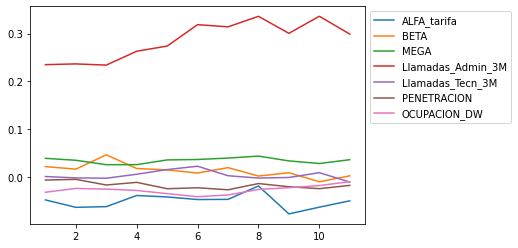

In [107]:
if conGraficos:
    ax = df_coef_T.plot.line()
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

## Analisis Específicos

In [108]:
data_reg

,ALFA_tarifa,ALFA,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,ind_churn,FECHA
COD_NODO,,,,,,,,,,
RO4,0.472908,0.271966,0.262215,0.409993,0.138030,0.251422,0.327354,0.699387,0.038730,7
KRI,0.609533,0.157346,0.298927,0.210794,0.363679,0.072900,0.267810,0.359557,0.082353,7
GIA,0.488906,0.037456,0.267557,0.055455,0.069053,0.000000,0.252507,0.397254,0.099032,7
1601,0.499674,0.324608,0.153394,0.778385,0.192423,0.036643,0.561535,0.642779,0.062092,6
CLD,0.475103,0.166712,0.204135,0.313440,0.256048,0.129449,0.651621,0.587460,0.102364,11
...,...,...,...,...,...,...,...,...,...,...
CS21,0.266964,0.286965,0.167077,0.640549,0.266649,0.056420,0.506350,0.696087,0.143405,7
S04,0.503752,0.445516,0.323249,0.555857,0.376505,0.141820,0.382343,0.336555,0.160209,11
LOM2,0.727705,0.093700,0.276749,0.134580,0.208811,0.132546,0.315506,0.787987,0.074866,3


In [109]:
data_reg_nor=data_reg.copy()

In [110]:
data_reg_nor=data_reg_nor.merge(maestro_data, left_index=True, right_on=['COD_NODO'], how='left')
data_reg_nor.set_index('COD_NODO', inplace=True)

In [111]:
data_reg_nor_temp=data_reg_nor.copy()

In [112]:
data_reg_nor.pop('FECHA')

COD_NODO
RO4      7
KRI      7
GIA      7
1601     6
CLD     11
        ..
CS21     7
S04     11
LOM2     3
472D     4
ACB     11
Name: FECHA, Length: 39225, dtype: int64

## Regional

In [113]:
dic_resultados_reg={}

In [114]:
for reg in regionales:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    y_train = data_aux.pop('ind_churn')
    X_train = data_aux[colums_reg]    
    #Modelos
    X_train_lm = sm.add_constant(X_train)
    lr_1 = sm.OLS(y_train, X_train_lm).fit()    
    dic_aux['coef']=lr_1.params.to_frame()
    dic_aux['coef'].columns=['coefs']
    # Cálculo VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    dic_aux['vif']=vif
    dic_resultados[reg]=dic_aux

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [115]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in regionales:
    print(reg)
    
    aux_tab_coef=dic_resultados[reg]['coef']
    aux_tab_vif=dic_resultados[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

REGION COSTA
REGION ORIENTE
REGION CENTRO
REGION NOROCCIDENTE
REGION OCCIDENTE


In [116]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])

In [117]:
df_coef_T

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
coefs,-0.052728,0.028592,0.025930,0.263782,0.011719,-0.019240,-0.026456
REGION COSTA,-0.084825,0.005747,0.026084,0.227558,0.009173,0.004649,-0.035635
REGION ORIENTE,-0.070816,0.020793,0.017651,0.269906,0.038278,-0.017978,0.002348
REGION CENTRO,-0.079352,0.036144,0.020294,0.256970,0.018962,-0.015360,-0.030596
REGION NOROCCIDENTE,-0.065412,0.022813,0.038475,0.269807,0.014174,0.012012,-0.022052
REGION OCCIDENTE,-0.022962,0.031979,0.044209,0.299605,0.008944,-0.002373,-0.020914


In [118]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.052728,0.028592,0.025930,0.263782,0.011719,-0.019240,-0.026456
REGION COSTA,-0.084825,0.005747,0.026084,0.227558,0.009173,0.004649,-0.035635
REGION ORIENTE,-0.070816,0.020793,0.017651,0.269906,0.038278,-0.017978,0.002348
REGION CENTRO,-0.079352,0.036144,0.020294,0.256970,0.018962,-0.015360,-0.030596
REGION NOROCCIDENTE,-0.065412,0.022813,0.038475,0.269807,0.014174,0.012012,-0.022052
REGION OCCIDENTE,-0.022962,0.031979,0.044209,0.299605,0.008944,-0.002373,-0.020914


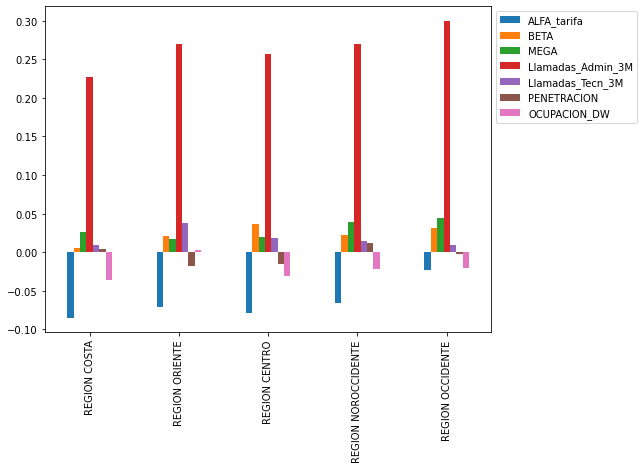

In [119]:
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

####  Analisis temporal

In [120]:
for reg in regionales:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['DIVISION']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)    

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11


In [121]:
DataSetEntregable_totales_temp_reg['CATEGORIA']=DataSetEntregable_totales_temp_reg['CATEGORIA'].fillna('NACIONAL')

In [122]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048623,0.021205,0.038550,0.234949,0.000460,-0.006946,-0.032527,NACIONAL
2,-0.064139,0.015920,0.034470,0.236514,-0.002453,-0.005526,-0.024526,NACIONAL
3,-0.062686,0.045960,0.025240,0.234006,-0.003114,-0.017346,-0.025954,NACIONAL
4,-0.039333,0.017227,0.025341,0.263117,0.005224,-0.011799,-0.028764,NACIONAL
5,-0.042391,0.014275,0.035231,0.273906,0.015032,-0.025123,-0.035453,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.017510,0.013788,0.063701,0.323824,0.026928,-0.015749,-0.050292,REGION OCCIDENTE
8,-0.009224,0.003603,0.077649,0.396686,-0.041464,-0.008419,-0.029046,REGION OCCIDENTE
9,-0.039773,0.011680,0.034612,0.320870,0.023712,0.004211,-0.038989,REGION OCCIDENTE
10,-0.021274,-0.017118,0.031946,0.361282,0.015304,-0.018468,-0.036325,REGION OCCIDENTE


## Ciudades

In [123]:
dic_resultados_ciudad_reg={}
for reg in ciudades:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['CIUDAD']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_ciudad_reg[reg]=dic_aux

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


In [124]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_ciudad_reg:
    print(reg)    
    aux_tab_coef=dic_resultados_ciudad_reg[reg]['coef']
    aux_tab_vif=dic_resultados_ciudad_reg[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA
CALI
MEDELLIN
PEREIRA
BUCARAMANGA
IBAGUE


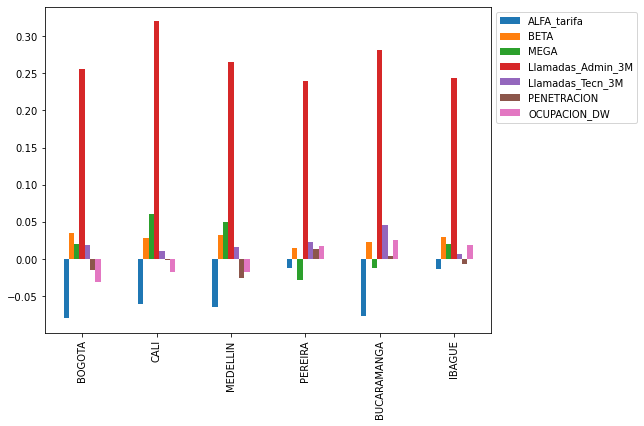

In [125]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [126]:
df_coef_T[1:]

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
BOGOTA,-0.079352,0.035634,0.020438,0.256478,0.019352,-0.015196,-0.030985
CALI,-0.060038,0.028908,0.060128,0.319807,0.010655,-0.001547,-0.017544
MEDELLIN,-0.064096,0.032120,0.049922,0.265246,0.015787,-0.025334,-0.017890
PEREIRA,-0.011975,0.014823,-0.027652,0.240028,0.023499,0.014088,0.018120
BUCARAMANGA,-0.076386,0.023147,-0.011724,0.281682,0.045158,0.003844,0.025016
IBAGUE,-0.013417,0.030184,0.019991,0.244045,0.007246,-0.006759,0.019108


In [127]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.052728,0.028592,0.025930,0.263782,0.011719,-0.019240,-0.026456
REGION COSTA,-0.084825,0.005747,0.026084,0.227558,0.009173,0.004649,-0.035635
REGION ORIENTE,-0.070816,0.020793,0.017651,0.269906,0.038278,-0.017978,0.002348
REGION CENTRO,-0.079352,0.036144,0.020294,0.256970,0.018962,-0.015360,-0.030596
REGION NOROCCIDENTE,-0.065412,0.022813,0.038475,0.269807,0.014174,0.012012,-0.022052
REGION OCCIDENTE,-0.022962,0.031979,0.044209,0.299605,0.008944,-0.002373,-0.020914
BOGOTA,-0.079352,0.035634,0.020438,0.256478,0.019352,-0.015196,-0.030985
CALI,-0.060038,0.028908,0.060128,0.319807,0.010655,-0.001547,-0.017544
MEDELLIN,-0.064096,0.032120,0.049922,0.265246,0.015787,-0.025334,-0.017890
PEREIRA,-0.011975,0.014823,-0.027652,0.240028,0.023499,0.014088,0.018120


#### Analisis temporal

In [128]:
for reg in ciudades:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['CIUDAD']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a


4
5
6
7
8
9
10
11
1
2


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [129]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048623,0.021205,0.038550,0.234949,0.000460,-0.006946,-0.032527,NACIONAL
2,-0.064139,0.015920,0.034470,0.236514,-0.002453,-0.005526,-0.024526,NACIONAL
3,-0.062686,0.045960,0.025240,0.234006,-0.003114,-0.017346,-0.025954,NACIONAL
4,-0.039333,0.017227,0.025341,0.263117,0.005224,-0.011799,-0.028764,NACIONAL
5,-0.042391,0.014275,0.035231,0.273906,0.015032,-0.025123,-0.035453,NACIONAL
...,...,...,...,...,...,...,...,...
7,0.008889,-0.050324,0.048254,0.306886,0.036962,-0.000062,-0.015005,IBAGUE
8,0.102116,-0.038054,0.085158,0.424378,-0.080697,0.078295,-0.044223,IBAGUE
9,-0.049266,-0.008170,0.014299,0.279945,0.128549,0.006704,0.051770,IBAGUE
10,-0.059968,-0.008902,0.012950,0.364948,-0.015850,-0.051941,-0.009190,IBAGUE


## Bogota

In [130]:
dic_resultados_Bogota={}
for reg in sectoresBog:
    print(reg)
    dic_aux={}    
    data_aux=data_reg_nor[data_reg_nor['AREA']==reg] 
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    
    if len(data_aux)>0:
        y_train = data_aux.pop('ind_churn')
        X_train = data_aux[colums_reg]   

        #Modelos
        X_train_lm = sm.add_constant(X_train)
        lr_1 = sm.OLS(y_train, X_train_lm).fit()    
        dic_aux['coef']=lr_1.params.to_frame()
        dic_aux['coef'].columns=['coefs']
        # Cálculo VIFs
        vif = pd.DataFrame()
        vif['Features'] = X_train.columns
        vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dic_aux['vif']=vif
        dic_resultados_Bogota[reg]=dic_aux

BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE


In [131]:
df_coef=df_coef_nal
df_vif=df_vif_nal
for reg in dic_resultados_Bogota:
    print(reg)    
    aux_tab_coef=dic_resultados_Bogota[reg]['coef']
    aux_tab_vif=dic_resultados_Bogota[reg]['vif']
    
    #aux_tab_coef.columns=[reg+'_coef']
    aux_tab_coef.columns=[reg]
    #aux_tab_vif.columns=['Features',reg+'_vif']
    aux_tab_vif.columns=['Features',reg]
    
    df_coef=df_coef.merge(aux_tab_coef,left_index=True,right_index=True, how='left')
    df_vif=df_vif.merge(aux_tab_vif,left_on='Features',right_on='Features', how='left')

BOGOTA ORIENTE
BOGOTA OCCIDENTE
BOGOTA SUR
BOGOTA NORTE


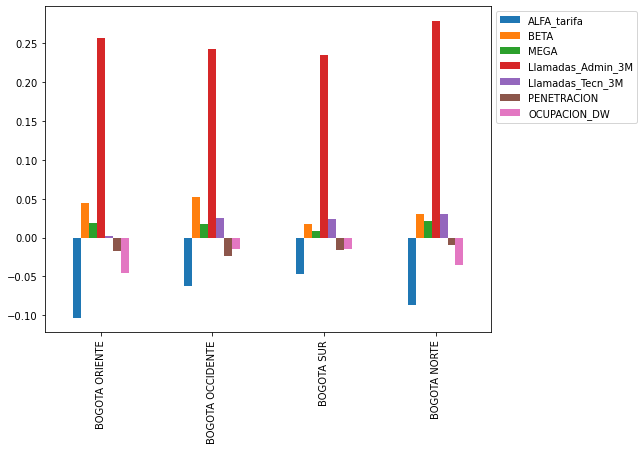

In [132]:
df_coef_T=df_coef.T
df_coef_T=df_coef_T.drop(columns=['const'])
if conGraficos:
    ax = df_coef_T[1:].plot.bar(figsize=(8, 6))
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot(figsize=(20,10));

In [133]:
DataSetEntregable_totales_reg=DataSetEntregable_totales_reg.append(df_coef_T[1:])
DataSetEntregable_totales_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW
NACIONAL,-0.052728,0.028592,0.025930,0.263782,0.011719,-0.019240,-0.026456
REGION COSTA,-0.084825,0.005747,0.026084,0.227558,0.009173,0.004649,-0.035635
REGION ORIENTE,-0.070816,0.020793,0.017651,0.269906,0.038278,-0.017978,0.002348
REGION CENTRO,-0.079352,0.036144,0.020294,0.256970,0.018962,-0.015360,-0.030596
REGION NOROCCIDENTE,-0.065412,0.022813,0.038475,0.269807,0.014174,0.012012,-0.022052
REGION OCCIDENTE,-0.022962,0.031979,0.044209,0.299605,0.008944,-0.002373,-0.020914
BOGOTA,-0.079352,0.035634,0.020438,0.256478,0.019352,-0.015196,-0.030985
CALI,-0.060038,0.028908,0.060128,0.319807,0.010655,-0.001547,-0.017544
MEDELLIN,-0.064096,0.032120,0.049922,0.265246,0.015787,-0.025334,-0.017890
PEREIRA,-0.011975,0.014823,-0.027652,0.240028,0.023499,0.014088,0.018120


### Analisis Temporal

In [134]:
for reg in sectoresBog:
    data_aux=data_reg_nor_temp[data_reg_nor_temp['AREA']==reg]
    data_aux=data_aux.select_dtypes(include=['float64', 'int','int64'])
    (df_coef, df_vif)=dic_reg_mes_ind(data_aux)
    df_coef_T=df_coef.T
    df_coef_T.pop('const')
    df_coef_T=df_coef_T[1:]
    df_coef_T['CATEGORIA']=reg
    DataSetEntregable_totales_temp_reg=DataSetEntregable_totales_temp_reg.append(df_coef_T)

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11


C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

In [135]:
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048623,0.021205,0.038550,0.234949,0.000460,-0.006946,-0.032527,NACIONAL
2,-0.064139,0.015920,0.034470,0.236514,-0.002453,-0.005526,-0.024526,NACIONAL
3,-0.062686,0.045960,0.025240,0.234006,-0.003114,-0.017346,-0.025954,NACIONAL
4,-0.039333,0.017227,0.025341,0.263117,0.005224,-0.011799,-0.028764,NACIONAL
5,-0.042391,0.014275,0.035231,0.273906,0.015032,-0.025123,-0.035453,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.103315,0.028838,0.022811,0.314826,0.011166,0.004621,-0.017640,BOGOTA NORTE
8,-0.036260,-0.017896,0.040387,0.365724,0.018449,0.009100,-0.055855,BOGOTA NORTE
9,-0.135668,0.030390,0.036293,0.325479,0.004449,-0.018887,-0.010115,BOGOTA NORTE
10,-0.097270,-0.001403,0.029683,0.362097,0.042001,-0.017587,-0.022076,BOGOTA NORTE


In [136]:
### Guardar Archivo

In [137]:
#DataSetEntregable_totales_reg.to_csv('RegresionesAgrupadas_14Dic.csv',sep=';')

In [138]:
#DataSetEntregable_totales_temp_reg.to_csv('RegresionesTemporales_14Dic.csv',sep=';')

## Resultados

In [139]:
DataSetEntregable_totales
DataSetEntregable_totales_temp
DataSetEntregable_totales_reg
DataSetEntregable_totales_temp_reg

,ALFA_tarifa,BETA,MEGA,Llamadas_Admin_3M,Llamadas_Tecn_3M,PENETRACION,OCUPACION_DW,CATEGORIA
1,-0.048623,0.021205,0.038550,0.234949,0.000460,-0.006946,-0.032527,NACIONAL
2,-0.064139,0.015920,0.034470,0.236514,-0.002453,-0.005526,-0.024526,NACIONAL
3,-0.062686,0.045960,0.025240,0.234006,-0.003114,-0.017346,-0.025954,NACIONAL
4,-0.039333,0.017227,0.025341,0.263117,0.005224,-0.011799,-0.028764,NACIONAL
5,-0.042391,0.014275,0.035231,0.273906,0.015032,-0.025123,-0.035453,NACIONAL
...,...,...,...,...,...,...,...,...
7,-0.103315,0.028838,0.022811,0.314826,0.011166,0.004621,-0.017640,BOGOTA NORTE
8,-0.036260,-0.017896,0.040387,0.365724,0.018449,0.009100,-0.055855,BOGOTA NORTE
9,-0.135668,0.030390,0.036293,0.325479,0.004449,-0.018887,-0.010115,BOGOTA NORTE
10,-0.097270,-0.001403,0.029683,0.362097,0.042001,-0.017587,-0.022076,BOGOTA NORTE
